# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW3: Q3<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Mohammadali Shakerdargah <center>
### <center>810196487<center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import statistics

In [35]:
class HopfieldNet:
    def __init__(self, _S, _T):
        self.S = _S
        self.T = _T
        self.W = np.zeros((len(_S[1]), len(_T[1])))
        
    def train(self):
        for trainSample in range(len(self.S)):
            x = self.S[trainSample]
            y = self.T[trainSample]
            for i in range(len(x)):
                for j in range(len(y)):
                    self.W[i][j] = self.W[i][j] + x[i]*y[j]
            for i in range(len(self.W)):
                for j in range(len(self.W[i])):
                    if(i==j):
                        self.W[i][j] = 0
                        
    def showResult(self, X):
        y_t = np.dot(X,self.W)
        for i in range(len(y_t)): #sign
            if(y_t[i] >= 0):
                y_t[i] = 1
            else:
                y_t[i] = -1
        plt.figure()
        plt.imshow(y_t.reshape((8,8)), cmap='binary')
        
    def showResultWithNoise(self, _S_space, _T_space, n): # n% of values with noise
        T_space = copy.deepcopy(_T_space)
        rightAns = 0
        S_space = copy.deepcopy(_S_space)
        for sample in range(len(S_space)):
            toNoise = int(len(S_space[0])*(n/100))
            randomIndexes = random.sample(range(1, len(S_space[0])-1), toNoise)
            for index in randomIndexes:
                if(S_space[sample][index] == 1):
                    S_space[sample][index] = -1
                else:
                    S_space[sample][index] = 1
        convergeTest = False
        count = 0
        while(convergeTest != True):       
            Y_list = []
            for sample in range(len(S_space)):
                y_sample = copy.deepcopy(S_space[sample])
                randomIndexes = random.sample(range(0, 64), 64)
                for index in randomIndexes:
                    y_sample_i =  S_space[sample][index]
                    for i in range(len(S_space[sample])):
                        y_sample_i += y_sample[i]*self.W[i][index]
                    if(y_sample_i > 0):
                        y_sample[index] = 1
                    elif(y_sample_i < 0):
                        y_sample[index] = -1
                    else:
                        y_sample[index] = y_sample_i
                Y_list.append(y_sample)
            Y_array = np.array(Y_list)
            if(np.array_equal(Y_array, T_space)): 
                convergeTest = True
            count +=1
        print("S space, desired:\n",T_space)
        print("\nFinal Output of network")
        print(Y_array)
        if(convergeTest == True):
            Res = "Converged to desired output"
        return (Res)

In [36]:
zero_s = np.array( [[1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, -1, -1, -1, -1, 1, 1],
                    [1, 1, -1, -1, -1, -1, 1, 1],
                    [1, 1, -1, -1, -1, -1, 1, 1],
                    [1, 1, -1, -1, -1, -1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1]])

one_s = np.array( [[-1, -1, 1, 1, 1, -1, -1, -1],
                   [-1, -1, 1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1],
                   [-1, -1, -1, 1, 1, -1, -1, -1]])

zero_s_reshaped = zero_s.reshape((zero_s.shape[0]*zero_s.shape[1]))
one_s_reshaped = one_s.reshape((one_s.shape[0]*one_s.shape[1]))

S = np.array([zero_s_reshaped, one_s_reshaped])
hopNN = HopfieldNet(copy.deepcopy(S), copy.deepcopy(S))
hopNN.train()

# Part A

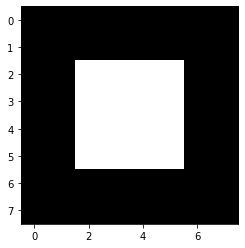

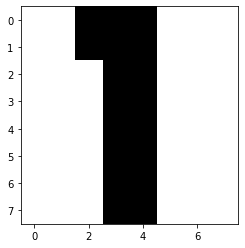

In [37]:
hopNN.showResult(zero_s_reshaped)
hopNN.showResult(one_s_reshaped)

# Part B

## Results of Inputs with 30% Noise 

In [38]:
n = 30
S = np.array([zero_s_reshaped, one_s_reshaped])  
res = hopNN.showResultWithNoise(S, S, n)
print('\n',res)

S space, desired:
 [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
   1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1]]

Final Output of network
[[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1
   1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [-1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1]]

 Converged to desired output


# Part C

In [43]:
hamming_dist = 0
for i in range(len(zero_s)):
    for j in range(len(zero_s[0])):
        if(zero_s[i][j] != one_s[i][j]):
            hamming_dist += 1
print(hamming_dist)

46
